In [1]:
%matplotlib inline

import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns

from sky_spot.utils import ClusterType

plt.rc('font', size=16)

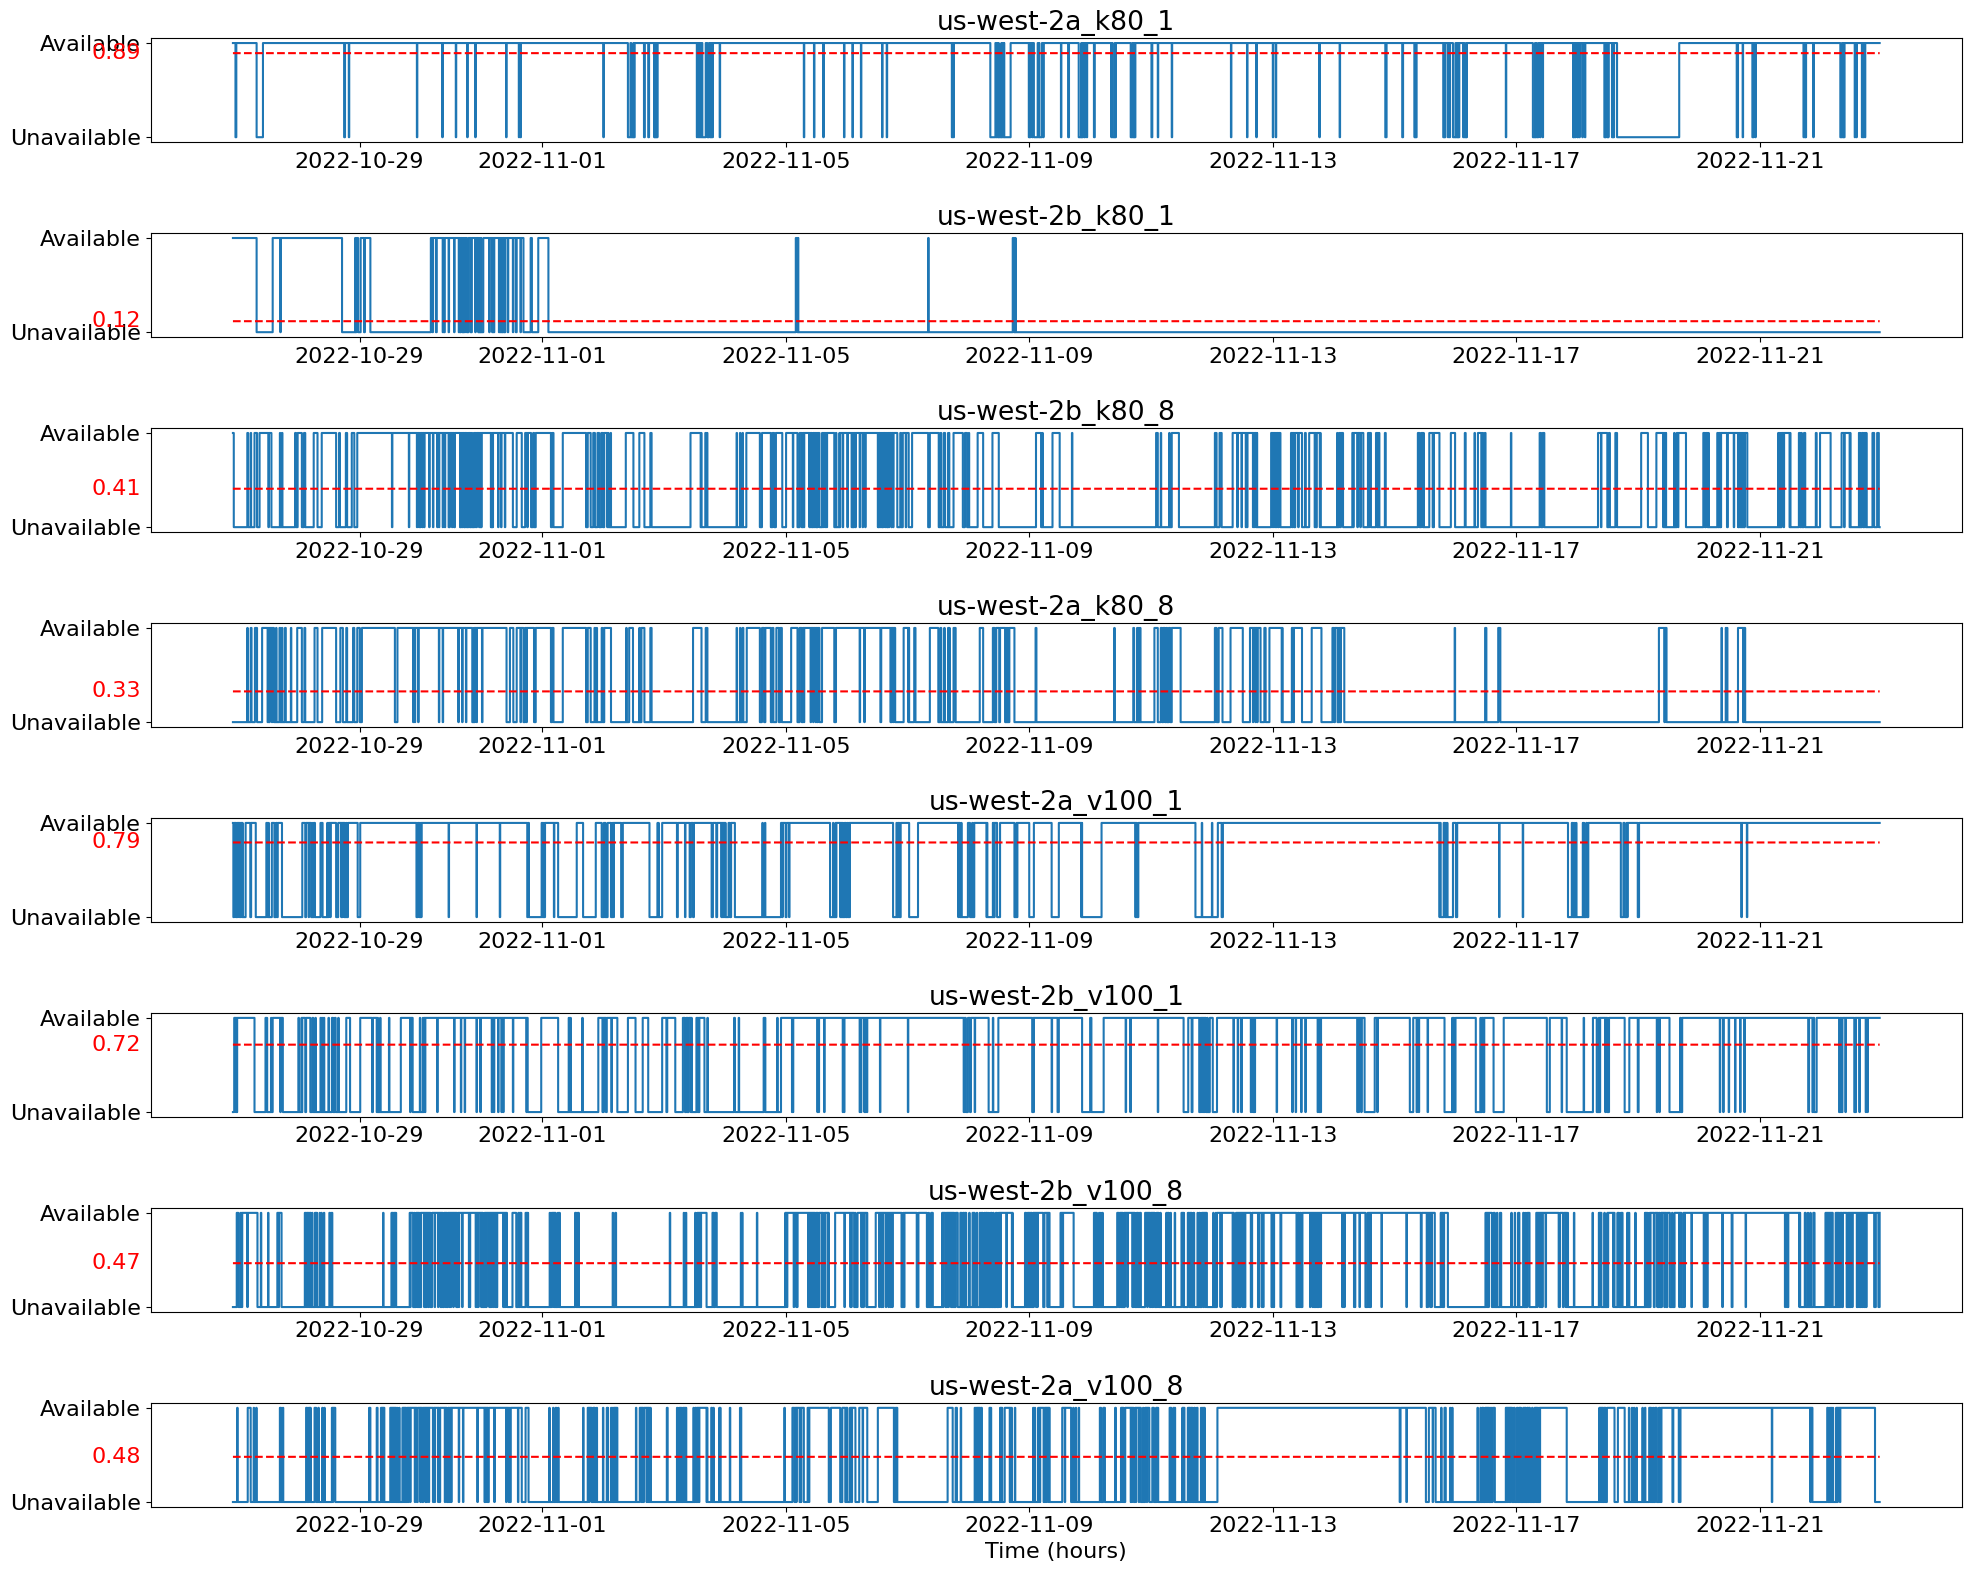

In [2]:
TRACE = 'traces/2022-10-26T22-05'

trace_path = pathlib.Path(TRACE).expanduser().absolute()
traces = {}
if trace_path.is_file():
    traces = {trace_path.stem: pd.read_csv(trace_path)}
else:
    for path in trace_path.glob('*.txt'):
        trace = pd.read_csv(path, names=['index', 'time', 'preempted'])
        traces[path.stem] = trace


fig, axes = plt.subplots(nrows=len(traces), ncols=1, figsize=(20, 2 * len(traces)))
sorted_traces = sorted(traces.items(), key=lambda x: x[0].partition('_')[-1])
for i, (trace_name, trace) in enumerate(sorted_traces):
    sns.lineplot(x=pd.to_datetime(trace['time'], format='%Y-%m-%dT%H:%M:%S.000Z'), y=1-trace['preempted'], ax=axes[i], drawstyle='steps-post')
    mean = (1 - trace['preempted']).mean()
    sns.lineplot(x=pd.to_datetime(trace['time'], format='%Y-%m-%dT%H:%M:%S.000Z'), y=mean, color='red', linestyle='--', ax=axes[i])
    trans = transforms.blended_transform_factory(
    axes[i].get_yticklabels()[0].get_transform(), axes[i].transData)
    axes[i].text(0, mean, "{:.2f}".format(mean), color="red", transform=trans, 
        ha="right", va="center")
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].set_title(trace_name)
    axes[i].set_yticks([0, 1])
    # axes[i].set_yticklabels(['Available', 'Unavailable'])
    axes[i].set_yticklabels(['Unavailable', 'Available'])

axes[i].set_xlabel('Time (hours)')
fig.tight_layout(h_pad=1.5)


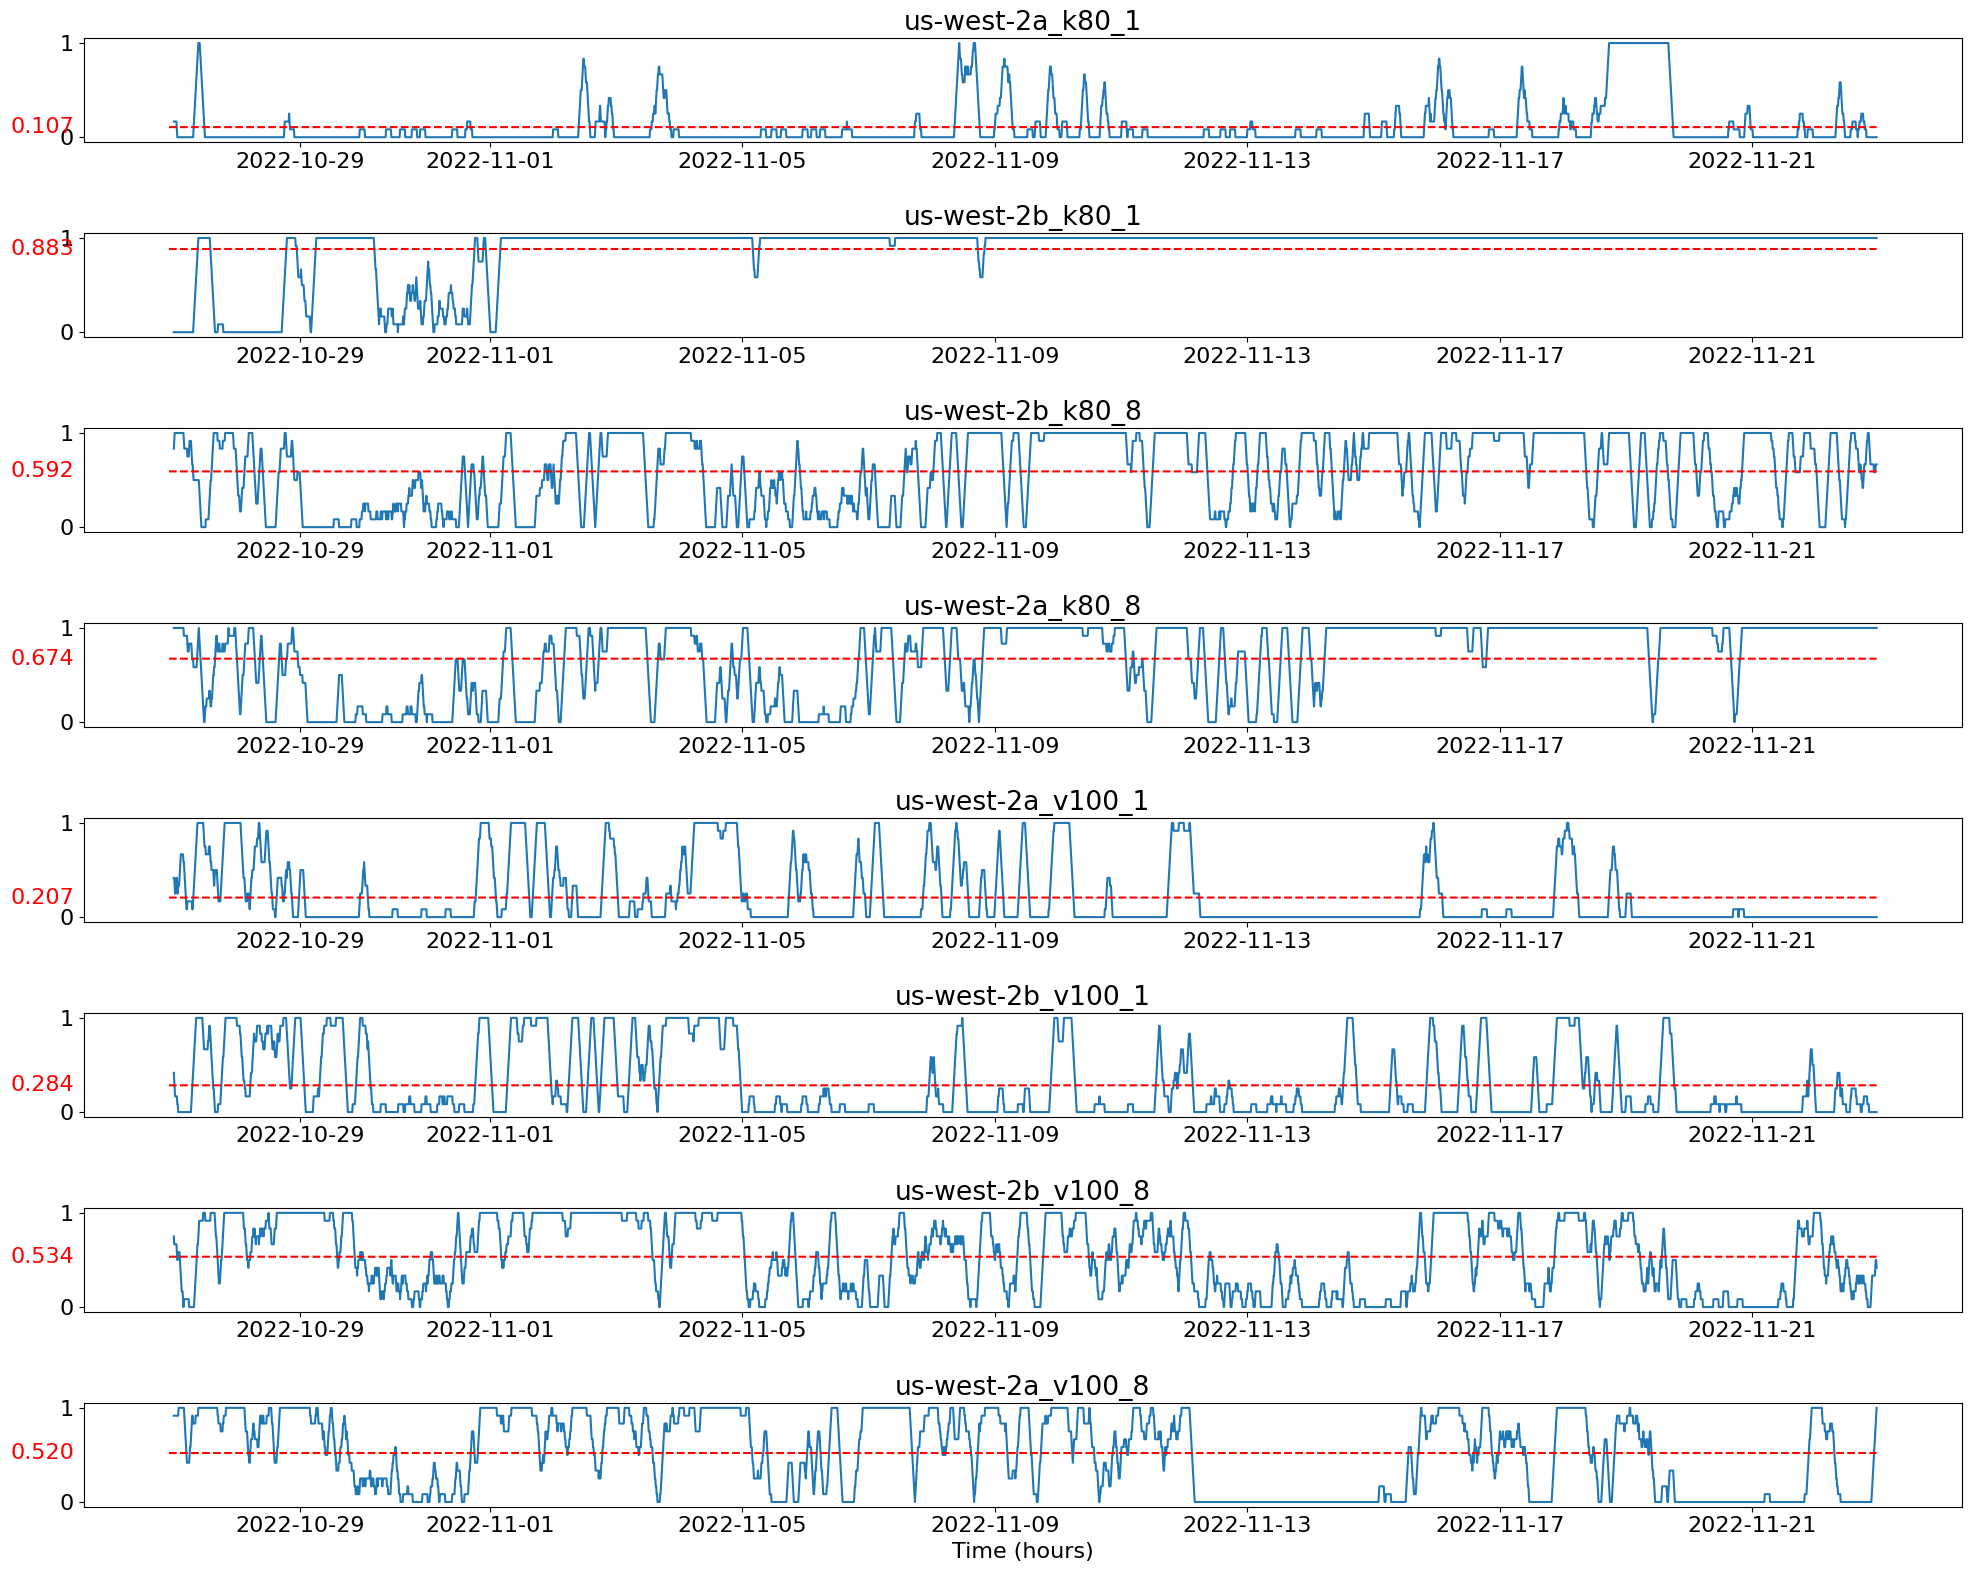

In [15]:
TRACE = 'traces/2022-10-26T22-05'

trace_path = pathlib.Path(TRACE).expanduser().absolute()
traces = {}
if trace_path.is_file():
    traces = {trace_path.stem: pd.read_csv(trace_path)}
else:
    for path in trace_path.glob('*.txt'):
        trace = pd.read_csv(path, names=['index', 'time', 'preempted'])
        # trace = trace.iloc[int(0.5 * len(trace)):]
        traces[path.stem] = trace


fig, axes = plt.subplots(nrows=len(traces), ncols=1, figsize=(20, 2 * len(traces)))
sorted_traces = sorted(traces.items(), key=lambda x: x[0].partition('_')[-1])
for i, (trace_name, trace) in enumerate(sorted_traces):
    ax = axes[i]
    sns.lineplot(x=pd.to_datetime(trace['time'], format='%Y-%m-%dT%H:%M:%S.000Z'), y=trace['preempted'].rolling(12).mean(), ax=ax)
    mean = trace['preempted'].mean()
    sns.lineplot(x=pd.to_datetime(trace['time'], format='%Y-%m-%dT%H:%M:%S.000Z'), y=mean, color='red', linestyle='--', ax=ax)
    trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
    ax.text(0, mean, "{:.3f}".format(mean), color="red", transform=trans, 
        ha="right", va="center")
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(trace_name)

axes[i].set_xlabel('Time (hours)')
fig.tight_layout(h_pad=1.5)


<AxesSubplot: xlabel='time', ylabel='preempted'>

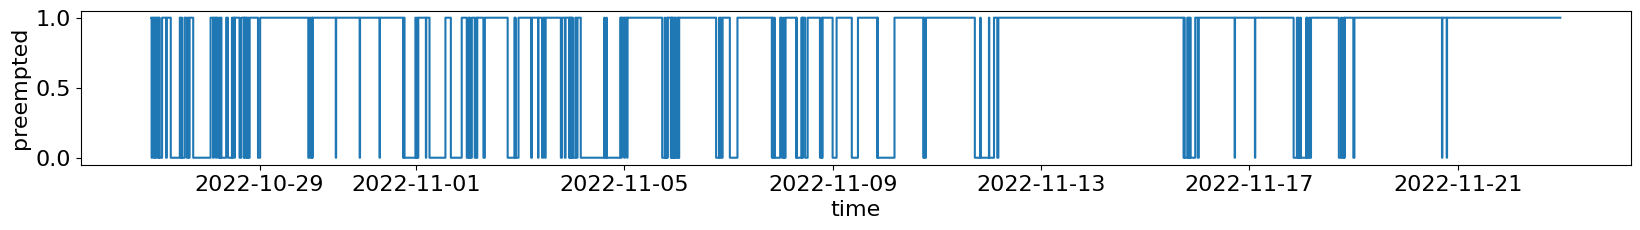

In [2]:
import pathlib
TRACE = 'traces/2022-10-26T22-05/us-west-2a_v100_1.txt'

trace_path = pathlib.Path(TRACE).expanduser().absolute()
avail_traces_month = {}
avail_traces_month = pd.read_csv(trace_path, names=['index', 'time', 'preempted'])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 2))
sns.lineplot(x=pd.to_datetime(avail_traces_month['time']), y=1-avail_traces_month['preempted'], drawstyle='steps-post', ax=ax)

Text(0.5, 0, 'Lifetime (Hours)')

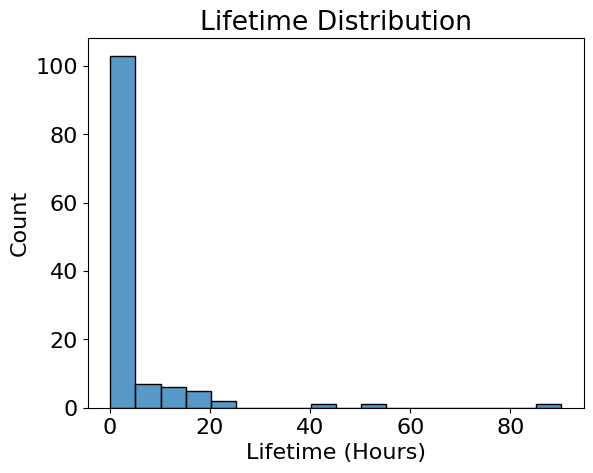

In [3]:
life_groups = avail_traces_month['preempted'].cumsum()
lifetimes = life_groups.groupby(life_groups).count() - 1
life_hours = lifetimes[lifetimes > 0] * 600 / 3600

ax = plt.subplot()
sns.histplot(life_hours, binwidth=5, ax=ax)
ax.set_title('Lifetime Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Lifetime (Hours)')

Text(0.5, 0, 'Wait Time (Hours)')

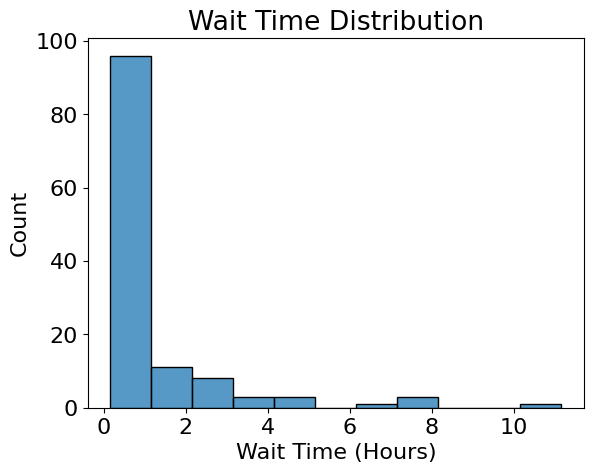

In [4]:
wait_groups = (1-avail_traces_month['preempted']).cumsum()
wait_times = wait_groups.groupby(wait_groups).count() - 1
wait_hours = wait_times[wait_times > 0] * 600 / 3600
ax = plt.subplot()
sns.histplot(wait_hours, binwidth=1, ax=ax)
ax.set_title('Wait Time Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Wait Time (Hours)')

## Fit traces